In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [42]:
training_set = image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [43]:
validation_set = image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [44]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [62]:
INPUT_SHAPE = (224, 224, 1)

In [46]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [47]:
model = tf.keras.models.Sequential()

In [48]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [49]:
model.add(mobnet)

In [50]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))

In [51]:
metrics_list = ['accuracy']

In [52]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [56]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=1)


2392/2392 [==============================] - 11044s 5s/step - loss: 1.1066 - accuracy: 0.8049 - val_loss: 0.9458 - val_accuracy: 0.8103


In [57]:
model.save("Trained_Model.h5")

In [58]:
model.save("Trained_Model.keras")

In [59]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [60]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'loss': [1.1066441535949707],
 'accuracy': [0.8049271106719971],
 'val_loss': [0.9458237886428833],
 'val_accuracy': [0.8102557063102722]}

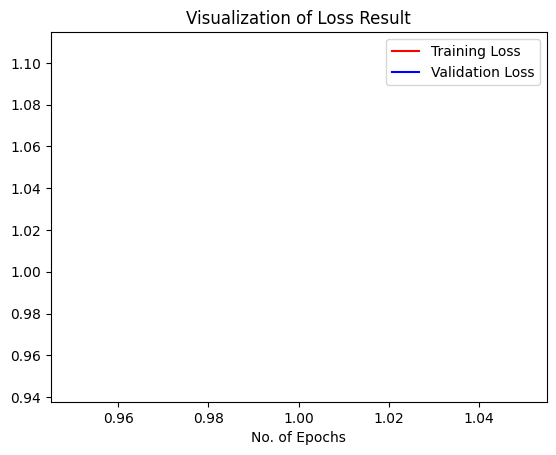

In [64]:
#Loss Visualization
epochs = [i for i in range(1,2)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [65]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [66]:
test_loss,test_acc = model.evaluate(test_set)

171/171 [==============================] - 216s 1s/step - loss: 0.9486 - accuracy: 0.8089


In [67]:
test_loss

0.9485899806022644

In [68]:
test_acc

0.8089271187782288

In [69]:
## Model Evaluation

In [70]:
model = tf.keras.models.load_model("Trained_Model.h5")

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [72]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [73]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [74]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [75]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

171/171 [==============================] - 185s 1s/step


In [76]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [77]:
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [78]:
### 1. Classification Report

In [79]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.99      0.82      3746
           1       0.00      0.00      0.00      1161
           2       0.00      0.00      0.00       887
           3       0.92      1.00      0.96      5139

    accuracy                           0.81     10933
   macro avg       0.40      0.50      0.44     10933
weighted avg       0.67      0.81      0.73     10933



c:\Users\Nandini\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nandini\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nandini\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [80]:
### 2. Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3720,    0,    0,   26],
       [ 947,    0,    0,  214],
       [ 699,    0,    0,  188],
       [  15,    0,    0, 5124]], dtype=int64)

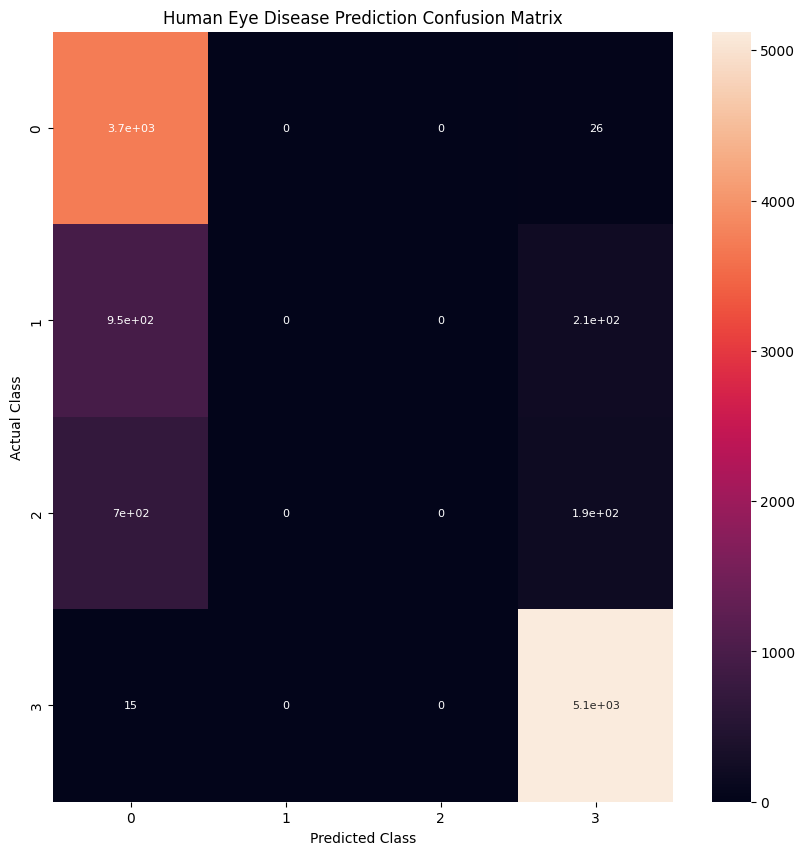

In [82]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()